C:\Users\ayush\anaconda3\envs\pr_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 - 20s - 25ms/step - accuracy: 0.4161 - loss: 1.6053
Epoch 2/5
782/782 - 18s - 22ms/step - accuracy: 0.5420 - loss: 1.2853
Epoch 3/5
782/782 - 20s - 25ms/step - accuracy: 0.5920 - loss: 1.1549
Epoch 4/5
782/782 - 17s - 22ms/step - accuracy: 0.6228 - loss: 1.0686
Epoch 5/5
782/782 - 17s - 22ms/step - accuracy: 0.6491 - loss: 1.0002
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

--- CNN Classification Report ---
              precision    recall  f1-score   support

    airplane       0.69      0.76      0.72      1000
  automobile       0.82      0.81      0.82      1000
        bird       0.60      0.56      0.58      1000
         cat       0.45      0.57      0.50      1000
        deer       0.72      0.50      0.59      1000
         dog       0.58      0.59      0.58      1000
        frog       0.71      0.80      0.75      1000
       horse       0.76      0.73      0.74      1000
        ship       0.81      0.80      0.80      1000
       truck       0.81      0.76

C:\Users\ayush\anaconda3\envs\pr_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
391/391 - 10s - 25ms/step - accuracy: 0.2417 - loss: 2.0590
Epoch 2/5
391/391 - 9s - 24ms/step - accuracy: 0.2821 - loss: 1.9423
Epoch 3/5
391/391 - 9s - 23ms/step - accuracy: 0.2939 - loss: 1.9126
Epoch 4/5
391/391 - 9s - 22ms/step - accuracy: 0.3041 - loss: 1.8854
Epoch 5/5
391/391 - 9s - 23ms/step - accuracy: 0.3175 - loss: 1.8524
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

--- ANN Classification Report ---
              precision    recall  f1-score   support

    airplane       0.58      0.26      0.36      1000
  automobile       0.44      0.53      0.48      1000
        bird       0.26      0.10      0.15      1000
         cat       0.27      0.25      0.26      1000
        deer       0.29      0.35      0.32      1000
         dog       0.48      0.18      0.27      1000
        frog       0.30      0.67      0.42      1000
       horse       0.47      0.34      0.40      1000
        ship       0.38      0.60      0.47      1000
       truck       0.43      0.41    

C:\Users\ayush\anaconda3\envs\pr_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ayush\anaconda3\envs\pr_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ayush\anaconda3\envs\pr_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.sh

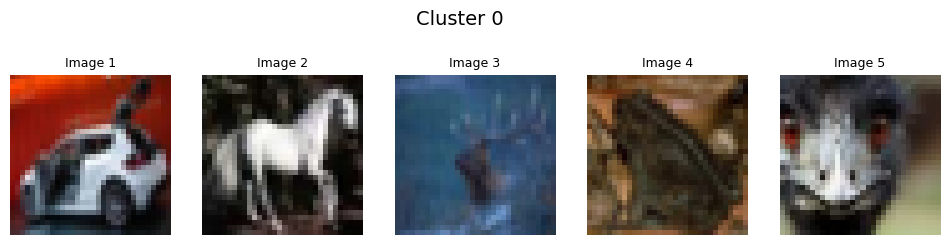


Cluster 1 → Majority class: ship


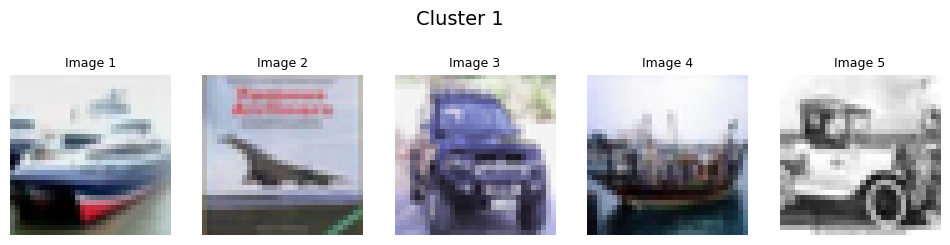


Cluster 2 → Majority class: bird


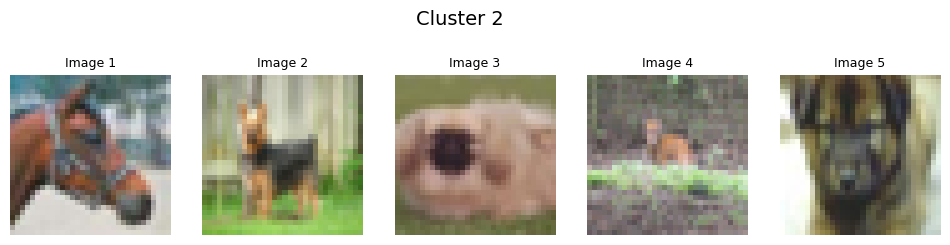


Cluster 3 → Majority class: frog


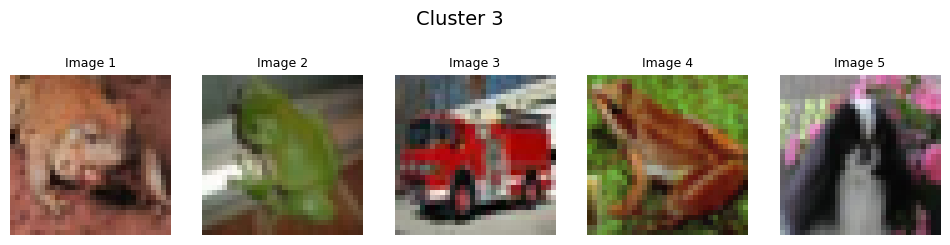


Cluster 4 → Majority class: airplane


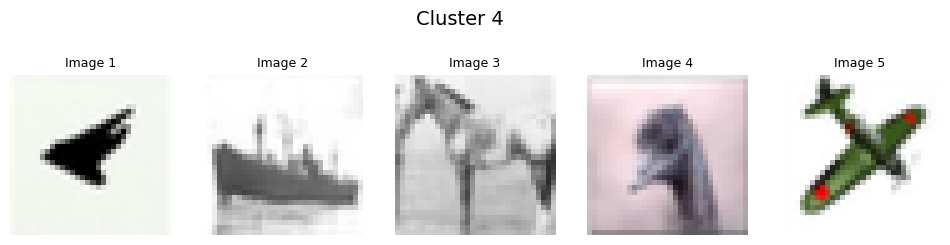


Cluster 5 → Majority class: deer


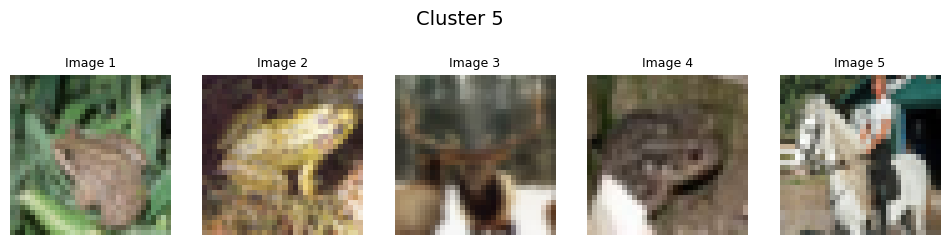


Cluster 6 → Majority class: airplane


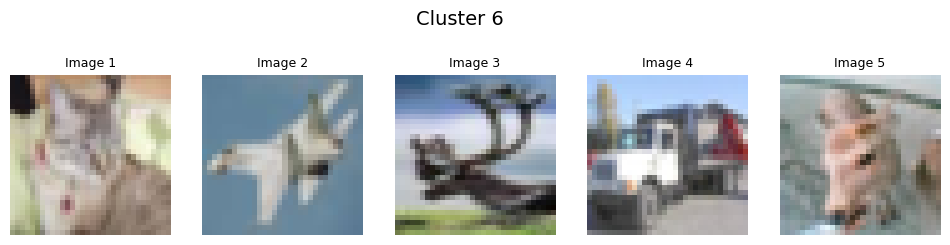


Cluster 7 → Majority class: dog


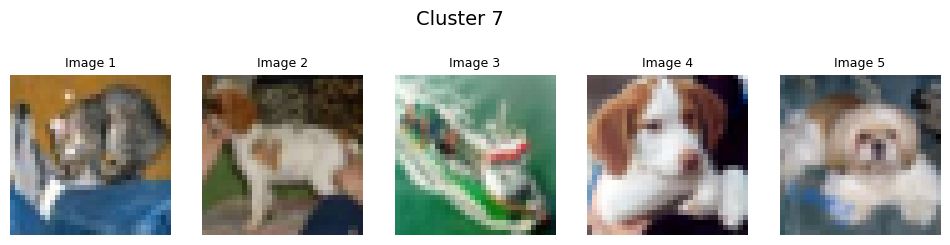


Cluster 8 → Majority class: truck


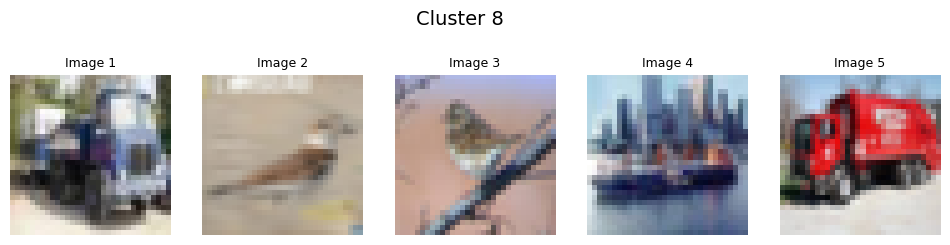


Cluster 9 → Majority class: truck


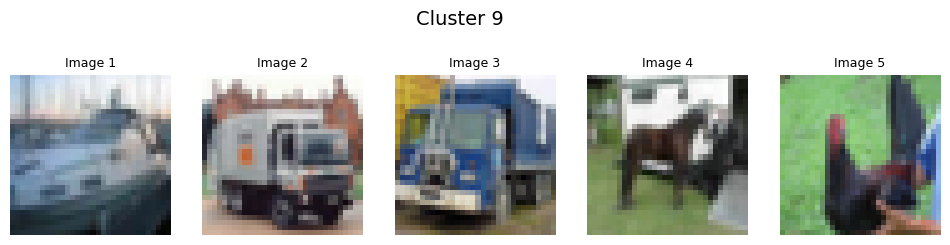


--- Final Accuracy Comparison ---
CNN    : 0.6863
ANN    : 0.3698
KMeans : 0.2226

✅ Best model on CIFAR-10: CNN


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# -------------------------
# Load & preprocess data
# -------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train, y_test = y_train.ravel(), y_test.ravel()

X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# -------------------------
# CNN (5 epochs)
# -------------------------
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train_cat, epochs=5, batch_size=64, verbose=2)

y_pred_cnn = np.argmax(cnn.predict(X_test), axis=1)
acc_cnn = accuracy_score(y_test, y_pred_cnn)

print("\n--- CNN Classification Report ---")
print(classification_report(y_test, y_pred_cnn, target_names=class_names))

# -------------------------
# ANN / MLP (5 epochs)
# -------------------------
ann = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

ann.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train_cat, epochs=5, batch_size=128, verbose=2)

y_pred_ann = np.argmax(ann.predict(X_test), axis=1)
acc_ann = accuracy_score(y_test, y_pred_ann)

print("\n--- ANN Classification Report ---")
print(classification_report(y_test, y_pred_ann, target_names=class_names))

# -------------------------
# KMeans + PCA
# -------------------------
X_flat = X_test.reshape(len(X_test), -1)

pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_flat)

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Map clusters to majority labels
cluster_map = {}
for c in range(10):
    labels = y_test[clusters == c]
    cluster_map[c] = Counter(labels).most_common(1)[0][0]

y_pred_kmeans = np.array([cluster_map[c] for c in clusters])
acc_kmeans = accuracy_score(y_test, y_pred_kmeans)

print("\n--- KMeans (mapped) Classification Report ---")
print(classification_report(y_test, y_pred_kmeans, target_names=class_names))

# -------------------------
# Display clusters clearly
# -------------------------
samples_per_cluster = 5

for c in range(10):
    idxs = np.where(clusters == c)[0][:samples_per_cluster]

    print(f"\nCluster {c} → Majority class: {class_names[cluster_map[c]]}")

    plt.figure(figsize=(12, 3))
    for i, idx in enumerate(idxs):
        ax = plt.subplot(1, samples_per_cluster, i + 1)
        ax.imshow(X_test[idx])
        ax.axis("off")
        ax.set_title(f"Image {i+1}", fontsize=9)

    plt.suptitle(f"Cluster {c}", fontsize=14)
    plt.show()

# -------------------------
# Final verdict
# -------------------------
print("\n--- Final Accuracy Comparison ---")
print(f"CNN    : {acc_cnn:.4f}")
print(f"ANN    : {acc_ann:.4f}")
print(f"KMeans : {acc_kmeans:.4f}")

best = max(
    [('CNN', acc_cnn), ('ANN', acc_ann), ('KMeans', acc_kmeans)],
    key=lambda x: x[1]
)

print(f"\n✅ Best model on CIFAR-10: {best[0]}")
